# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\amonr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer' + str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer' + str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session()
    print('Experiment with LR = %.6f, Optimizer = %s' % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp-lr-%s-optimizer-%s' % (str(lr), str(opti))
    results[exp_name_tag] = {'train_loss': train_loss,
                             'valid_loss': valid_loss,
                             'train_acc': train_acc,
                             'valid_acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 1000

50000/50000 [==============================] - 5s 108us/step - loss: 0.7554 - acc: 0.7330 - val_loss: 1.8011 - val_acc: 0.4814
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890


Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 106.4852 - acc: 0.0998 - val_loss: 2.3046 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.4924 - acc: 0.1003 - val_loss: 2.3054 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3048 - acc: 0.0969 - val_loss: 2.3077 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.3053 - acc: 0.1006 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.3054 - acc: 0.1011 - val_loss: 2.3063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.3054 - acc: 0.1001 - val_loss: 2.3061 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3060 - acc: 0.1011 - val_loss: 2.3059 

50000/50000 [==============================] - 5s 103us/step - loss: 2.0406 - acc: 0.2755 - val_loss: 1.9410 - val_acc: 0.3102
Epoch 2/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.8725 - acc: 0.3387 - val_loss: 1.8786 - val_acc: 0.3431
Epoch 3/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.8035 - acc: 0.3653 - val_loss: 1.8020 - val_acc: 0.3561
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7575 - acc: 0.3836 - val_loss: 1.7404 - val_acc: 0.3835
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7221 - acc: 0.3951 - val_loss: 1.7166 - val_acc: 0.3943
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.6973 - acc: 0.4030 - val_loss: 1.7658 - val_acc: 0.3732
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.6678 - acc: 0.4138 - val_loss: 1.6943 - val_acc: 0.4040
Epoch 8/50
50000/50000 [========================

50000/50000 [==============================] - 6s 126us/step - loss: 2.1757 - acc: 0.1670 - val_loss: 2.0854 - val_acc: 0.1806
Epoch 3/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.1008 - acc: 0.2036 - val_loss: 2.0034 - val_acc: 0.2486
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.0158 - acc: 0.2488 - val_loss: 1.9397 - val_acc: 0.2698
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9536 - acc: 0.2729 - val_loss: 1.9553 - val_acc: 0.2635
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.9361 - acc: 0.2789 - val_loss: 1.9396 - val_acc: 0.2706
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.9178 - acc: 0.2870 - val_loss: 1.8951 - val_acc: 0.2854
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8972 - acc: 0.2968 - val_loss: 2.0588 - val_acc: 0.2692
Epoch 9/50
50000/50000 [=====================

Epoch 3/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.7343 - acc: 0.3779 - val_loss: 1.7216 - val_acc: 0.3810
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6717 - acc: 0.4031 - val_loss: 1.6429 - val_acc: 0.4179
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6240 - acc: 0.4203 - val_loss: 1.6107 - val_acc: 0.4201
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5869 - acc: 0.4339 - val_loss: 1.5840 - val_acc: 0.4291
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5549 - acc: 0.4467 - val_loss: 1.6165 - val_acc: 0.4241
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5235 - acc: 0.4601 - val_loss: 1.5722 - val_acc: 0.4367
Epoch 9/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4982 - acc: 0.4682 - val_loss: 1.5638 - val_acc: 0.4358
Epoch 10/50
50000/50000 [=========

Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7054 - acc: 0.3837 - val_loss: 1.7480 - val_acc: 0.3655
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6695 - acc: 0.3982 - val_loss: 1.6374 - val_acc: 0.4099
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6418 - acc: 0.4083 - val_loss: 1.6278 - val_acc: 0.4151
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6245 - acc: 0.4133 - val_loss: 1.6313 - val_acc: 0.4155
Epoch 8/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5996 - acc: 0.4228 - val_loss: 1.6506 - val_acc: 0.4012
Epoch 9/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6044 - acc: 0.4220 - val_loss: 1.6059 - val_acc: 0.4324
Epoch 10/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5789 - acc: 0.4300 - val_loss: 1.5956 - val_acc: 0.4202
Epoch 11/50
50000/50000 [========

Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0389 - acc: 0.2940 - val_loss: 2.0228 - val_acc: 0.2964
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.0091 - acc: 0.3055 - val_loss: 1.9952 - val_acc: 0.3051
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9841 - acc: 0.3136 - val_loss: 1.9724 - val_acc: 0.3169
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.9628 - acc: 0.3209 - val_loss: 1.9538 - val_acc: 0.3232
Epoch 9/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9443 - acc: 0.3282 - val_loss: 1.9356 - val_acc: 0.3283
Epoch 10/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9278 - acc: 0.3344 - val_loss: 1.9204 - val_acc: 0.3352
Epoch 11/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.9131 - acc: 0.3384 - val_loss: 1.9066 - val_acc: 0.3365
Epoch 12/50
50000/50000 [==============

50000/50000 [==============================] - 6s 126us/step - loss: 1.6570 - acc: 0.4056 - val_loss: 1.7880 - val_acc: 0.3684
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6139 - acc: 0.4231 - val_loss: 1.7731 - val_acc: 0.3896
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5728 - acc: 0.4376 - val_loss: 1.5968 - val_acc: 0.4203
Epoch 8/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5334 - acc: 0.4528 - val_loss: 1.6543 - val_acc: 0.4188
Epoch 9/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5074 - acc: 0.4630 - val_loss: 1.6787 - val_acc: 0.4211
Epoch 10/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4796 - acc: 0.4707 - val_loss: 1.6577 - val_acc: 0.4088
Epoch 11/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4491 - acc: 0.4825 - val_loss: 1.6267 - val_acc: 0.4285
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 7s 135us/step - loss: 1.6383 - acc: 0.4272 - val_loss: 1.6470 - val_acc: 0.4101
Epoch 6/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6089 - acc: 0.4355 - val_loss: 1.6191 - val_acc: 0.4212
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5850 - acc: 0.4457 - val_loss: 1.5893 - val_acc: 0.4322
Epoch 8/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5641 - acc: 0.4521 - val_loss: 1.5902 - val_acc: 0.4369
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5450 - acc: 0.4587 - val_loss: 1.5761 - val_acc: 0.4427
Epoch 10/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5280 - acc: 0.4674 - val_loss: 1.5877 - val_acc: 0.4406
Epoch 11/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5145 - acc: 0.4711 - val_loss: 1.5364 - val_acc: 0.4601
Epoch 12/50
50000/50000 [==================

Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4688 - acc: 0.4775 - val_loss: 1.4774 - val_acc: 0.4767
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.4366 - acc: 0.4879 - val_loss: 1.4493 - val_acc: 0.4892
Epoch 8/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.3979 - acc: 0.5033 - val_loss: 1.4517 - val_acc: 0.4854
Epoch 9/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.3684 - acc: 0.5136 - val_loss: 1.4397 - val_acc: 0.4921
Epoch 10/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.3511 - acc: 0.5195 - val_loss: 1.4455 - val_acc: 0.4907
Epoch 11/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3342 - acc: 0.5259 - val_loss: 1.3871 - val_acc: 0.5041
Epoch 12/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3121 - acc: 0.5340 - val_loss: 1.3982 - val_acc: 0.5083
Epoch 13/50
50000/50000 [======

Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2539 - acc: 0.1843 - val_loss: 2.2519 - val_acc: 0.1841
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.2460 - acc: 0.1920 - val_loss: 2.2443 - val_acc: 0.1940
Epoch 9/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2386 - acc: 0.1992 - val_loss: 2.2372 - val_acc: 0.1996
Epoch 10/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.2316 - acc: 0.2052 - val_loss: 2.2304 - val_acc: 0.2069
Epoch 11/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.2248 - acc: 0.2113 - val_loss: 2.2239 - val_acc: 0.2115
Epoch 12/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.2182 - acc: 0.2164 - val_loss: 2.2175 - val_acc: 0.2161
Epoch 13/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.2119 - acc: 0.2212 - val_loss: 2.2115 - val_acc: 0.2197
Epoch 14/50
50000/50000 [=======

Epoch 8/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5056 - acc: 0.4684 - val_loss: 1.6421 - val_acc: 0.4101
Epoch 9/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4814 - acc: 0.4771 - val_loss: 1.5750 - val_acc: 0.4377
Epoch 10/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4595 - acc: 0.4851 - val_loss: 1.6098 - val_acc: 0.4461
Epoch 11/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4366 - acc: 0.4919 - val_loss: 1.6308 - val_acc: 0.4267
Epoch 12/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4152 - acc: 0.5021 - val_loss: 1.4809 - val_acc: 0.4734
Epoch 13/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3976 - acc: 0.5067 - val_loss: 1.5449 - val_acc: 0.4509
Epoch 14/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3768 - acc: 0.5150 - val_loss: 1.5257 - val_acc: 0.4430
Epoch 15/50
50000/50000 [====

Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7845 - acc: 0.3779 - val_loss: 1.7840 - val_acc: 0.3786
Epoch 10/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7765 - acc: 0.3812 - val_loss: 1.7795 - val_acc: 0.3806
Epoch 11/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7693 - acc: 0.3824 - val_loss: 1.7701 - val_acc: 0.3842
Epoch 12/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7629 - acc: 0.3854 - val_loss: 1.7649 - val_acc: 0.3872
Epoch 13/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7568 - acc: 0.3872 - val_loss: 1.7583 - val_acc: 0.3897
Epoch 14/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7513 - acc: 0.3896 - val_loss: 1.7526 - val_acc: 0.3888
Epoch 15/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7459 - acc: 0.3908 - val_loss: 1.7479 - val_acc: 0.3954
Epoch 16/50
50000/50000 [===

Epoch 10/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.3758 - acc: 0.5163 - val_loss: 1.4264 - val_acc: 0.4934
Epoch 11/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3493 - acc: 0.5274 - val_loss: 1.4271 - val_acc: 0.4947
Epoch 12/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3296 - acc: 0.5327 - val_loss: 1.3967 - val_acc: 0.5044
Epoch 13/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3102 - acc: 0.5388 - val_loss: 1.3669 - val_acc: 0.5150
Epoch 14/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.2894 - acc: 0.5454 - val_loss: 1.3741 - val_acc: 0.5155
Epoch 15/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.2713 - acc: 0.5526 - val_loss: 1.3706 - val_acc: 0.5180
Epoch 16/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.2568 - acc: 0.5583 - val_loss: 1.3610 - val_acc: 0.5189
Epoch 17/50
50000/50000 [==

Epoch 11/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3105 - acc: 0.1335 - val_loss: 2.3091 - val_acc: 0.1308
Epoch 12/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3078 - acc: 0.1345 - val_loss: 2.3064 - val_acc: 0.1317
Epoch 13/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.3053 - acc: 0.1353 - val_loss: 2.3039 - val_acc: 0.1334
Epoch 14/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.3029 - acc: 0.1359 - val_loss: 2.3015 - val_acc: 0.1343
Epoch 15/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.3006 - acc: 0.1368 - val_loss: 2.2992 - val_acc: 0.1366
Epoch 16/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2984 - acc: 0.1377 - val_loss: 2.2970 - val_acc: 0.1377
Epoch 17/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.2964 - acc: 0.1383 - val_loss: 2.2949 - val_acc: 0.1377
Epoch 18/50
50000/50000 [=========

Epoch 12/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6544 - acc: 0.4291 - val_loss: 1.6586 - val_acc: 0.4223
Epoch 13/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6421 - acc: 0.4312 - val_loss: 1.6486 - val_acc: 0.4240
Epoch 14/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6289 - acc: 0.4362 - val_loss: 1.6382 - val_acc: 0.4305
Epoch 15/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.6178 - acc: 0.4404 - val_loss: 1.6258 - val_acc: 0.4339
Epoch 16/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6063 - acc: 0.4445 - val_loss: 1.6345 - val_acc: 0.4243
Epoch 17/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5959 - acc: 0.4476 - val_loss: 1.6161 - val_acc: 0.4361
Epoch 18/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5865 - acc: 0.4510 - val_loss: 1.6128 - val_acc: 0.4355
Epoch 19/50
50000/50000 [==

50000/50000 [==============================] - 6s 125us/step - loss: 2.1219 - acc: 0.2602 - val_loss: 2.1196 - val_acc: 0.2630
Epoch 13/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.1155 - acc: 0.2622 - val_loss: 2.1134 - val_acc: 0.2652
Epoch 14/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.1093 - acc: 0.2648 - val_loss: 2.1075 - val_acc: 0.2677
Epoch 15/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.1035 - acc: 0.2673 - val_loss: 2.1020 - val_acc: 0.27091
Epoch 16/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0980 - acc: 0.2689 - val_loss: 2.0966 - val_acc: 0.2739
Epoch 17/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0927 - acc: 0.2721 - val_loss: 2.0914 - val_acc: 0.2759
Epoch 18/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0877 - acc: 0.2746 - val_loss: 2.0866 - val_acc: 0.2774
Epoch 19/50
50000/50000 [=============

Epoch 13/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6339 - acc: 0.4362 - val_loss: 1.6397 - val_acc: 0.4298
Epoch 14/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6223 - acc: 0.4386 - val_loss: 1.6287 - val_acc: 0.4327
Epoch 15/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.6105 - acc: 0.4435 - val_loss: 1.6186 - val_acc: 0.4342
Epoch 16/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5974 - acc: 0.4477 - val_loss: 1.6096 - val_acc: 0.4342
Epoch 17/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5870 - acc: 0.4511 - val_loss: 1.6007 - val_acc: 0.4400
Epoch 18/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5780 - acc: 0.4545 - val_loss: 1.5977 - val_acc: 0.4415
Epoch 19/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5685 - acc: 0.4571 - val_loss: 1.5821 - val_acc: 0.4440
Epoch 20/50
50000/50000 [==

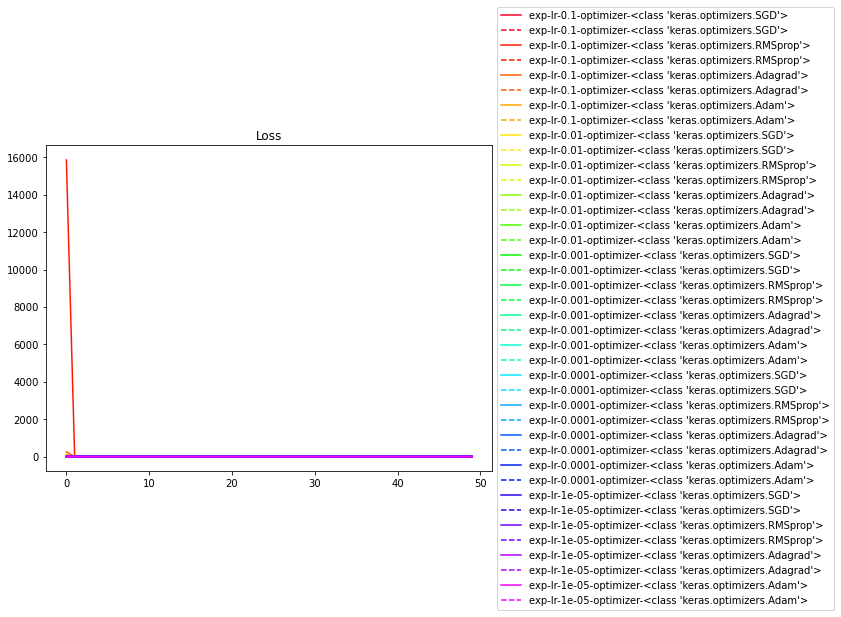

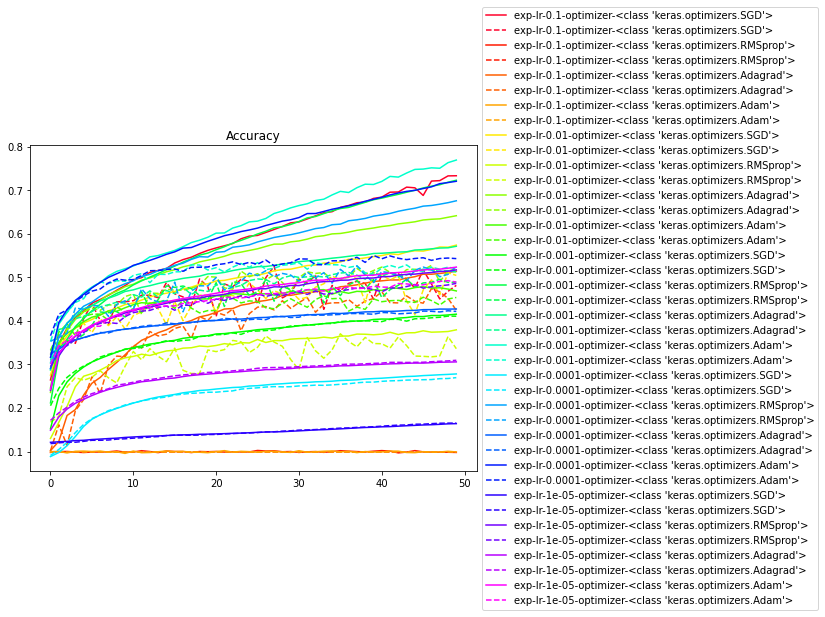

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()